# Librerias

In [293]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import zipfile

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot') 

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

import multiprocessing

In [296]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Valores: predicciones negativos, no tenia sentido. Se puede modelar el logaritmo

Ausencia de predictores: si es negativo, medias anteriores

sistema determinista en el que se asume unas condiciones de proceso dan un determinado resultado no como serie temporal de la variable respuesta. Proceso dinamico, interesa la P hace x tiempo no la de ahora, en un tramo previo del circuito. El valor de la variable hace 8 horas no influye 


columnas completas, variables correlacionadas, columnas con valores constantes, columnas muy desbalanceadas? combinar grupos minoritarios.
comenzar regresion logistica sin regu
regularizar por correlaciones
random forest, gradient boosting
metricas:
accuracy, F1 score
AUC - ROC



# Datos modelizacion

In [84]:
zip_file = zipfile.ZipFile(r".\Archive.zip")
datos_model_raw = pd.read_csv(zip_file.open("datos_para_modelizacion.csv"))
print(datos_model_raw.shape)
datos_model_raw.head(5)

(96188, 277)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
0,9248245,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,1.0,0,0.0,0.0,0,0.0,0,0.0,0
1,10037840,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
2,10299029,0.0,0,0,0.0,0.0,24.44,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
3,10907006,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
4,14080498,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0


# Análisis descriptivo

In [3]:
datos_model_raw.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
count,9.618800e+04,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,...,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000
mean,6.508026e+08,0.001985,0.009752,0.001071,0.0,0.000335,2.934996,0.000245,0.035151,0.206211,...,0.000602,0.759627,0.000073,0.031579,0.375511,0.0,0.000218,0.000042,0.005895,0.036314
std,7.305800e+08,0.232712,0.099947,0.032706,0.0,0.103920,14.669620,0.075933,2.553340,0.404586,...,0.131917,4.216230,0.008531,1.012583,4.675368,0.0,0.039093,0.006449,0.488573,0.187072
min,3.937070e+05,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.268936e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,3.657658e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,6.240783e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,3.140207e+09,27.280000,3.000000,1.000000,0.0,32.230000,222.680000,23.550000,337.120000,1.000000,...,28.930000,442.000000,1.000000,112.500000,220.810000,0.0,7.000000,1.000000,40.500000,1.000000


## Variable Respuesta 

In [31]:
y = datos_model_raw["label"]
y.head(3)

0    0
1    0
2    0
Name: label, dtype: int64

In [33]:
y.value_counts()

0    92695
1     3493
Name: label, dtype: int64

<AxesSubplot:>

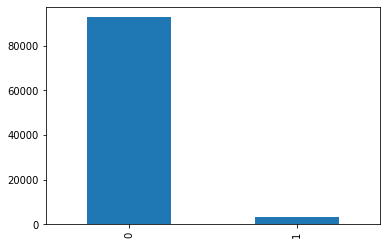

In [40]:
# Gráfico
# ==============================================================================
y.value_counts().plot(kind="bar")

## Predictores

### Valores constantes

Se eliminar columnas con valores constantes

In [85]:
datos_model = datos_model_raw.copy()

# Numero de columnas con valores constantes
def valor_constante(col):
    col = col.to_numpy()
    return (col[0] == col).all()

cols_constantes = []

for col in datos_model.columns:
    if valor_constante(datos_model[col]):
        cols_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(cols_constantes))
print(cols_constantes)

Número de columnas con valores constantes:  36
['var_4', 'var_11', 'var_22', 'var_24', 'var_28', 'var_31', 'var_50', 'var_55', 'var_58', 'var_61', 'var_65', 'var_70', 'var_78', 'var_84', 'var_91', 'var_113', 'var_114', 'var_125', 'var_127', 'var_147', 'var_154', 'var_158', 'var_169', 'var_182', 'var_190', 'var_193', 'var_206', 'var_214', 'var_217', 'var_221', 'var_225', 'var_233', 'var_251', 'var_256', 'var_265', 'var_272']


In [86]:
datos_model = datos_model.drop(cols_constantes, axis=1)
datos_model.head()

,var_0,var_1,var_2,var_3,var_5,var_6,var_7,var_8,var_9,var_10,...,var_266,var_267,var_268,var_269,var_270,var_271,var_273,var_274,var_275,label
0,9248245,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,10037840,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
2,10299029,0.0,0,0,0.0,24.44,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
3,10907006,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
4,14080498,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0


### NaNs

Columnas con algún missing value

In [87]:
# Columnas con número NaN >= 1
def is_nan(df_col):
    if df_col.isna().sum() >=1:
        x = True
    else:
        x = False
    return x

cols_with_nan = {}

for col in datos_model.columns:
    if is_nan(datos_model[col]):
        cols_with_nan[col] = datos_model[col].isna().sum()
        
print("Número de columnas con algún Nan: ", len(cols_with_nan))
print(cols_with_nan)

Número de columnas con algún Nan:  1
{'var_174': 19642}


In [88]:
print(datos_model["var_174"].describe())
datos_model["var_174"].unique()

count           76546
unique              3
top       CONVERGENTE
freq            36653
Name: var_174, dtype: object


array(['HIPERCONVERGENTE', 'CONVERGENTE', nan, 'RESTO'], dtype=object)

Se completa la var_174 añadiendo los Nan a la categoría RESTO, lo ideal sería hablarlo con negocio

In [89]:
datos_model["var_174"] = datos_model["var_174"].fillna(value="RESTO")

In [90]:
print(datos_model["var_174"].isna().sum())
print(datos_model["var_174"].unique())

0
['HIPERCONVERGENTE' 'CONVERGENTE' 'RESTO']


### Duplicates

In [67]:
# Filas duplicadas
datos_model.duplicated().sum()

0

In [68]:
# Columnas duplicadas
datos_model.T.duplicated().sum()

0

### Variables cualitativas

Se comprueban si existen y los valores de las columnas no numéricas

In [69]:
# Columnas no numéricas
df_no_num = datos_model.select_dtypes(exclude=["float64", "int64"])
df_no_num

,var_105,var_174,var_213
0,antiguedad_0_6,HIPERCONVERGENTE,asignacion_NLMPYME_Low
1,antiguedad_12_18,CONVERGENTE,asignacion_NLMPYME_Low
2,antiguedad_36_72,CONVERGENTE,asignacion_NLMPYME_Low
3,antiguedad_6_12,CONVERGENTE,asignacion_NLMPYME_Low
4,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Low
...,...,...,...
96183,antiguedad_gt_120,CONVERGENTE,asignacion_NLMPYME_Legacy_Ono
96184,antiguedad_0_6,CONVERGENTE,asignacion_NLMPYME_Low
96185,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Legacy_Ono
96186,antiguedad_24_36,CONVERGENTE,asignacion_NLMPYME_Legacy_Ono


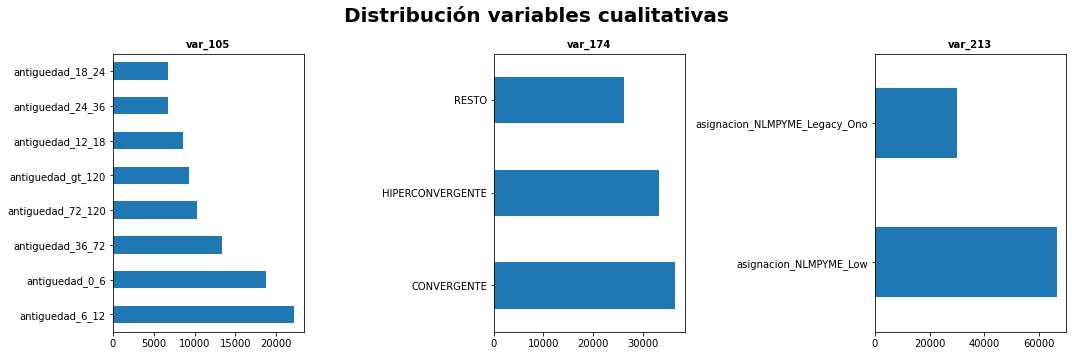

In [138]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat
columnas_object = df_no_num.columns

for i, colum in enumerate(columnas_object):
    df_no_num[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold");

### Numéricas

In [91]:
# Correlación entre columnas numéricas
corr_mat = datos_model.select_dtypes(include=["float64", "int64"]).corr(method='pearson')

In [92]:
def tidy_corr_matrix(corr_mat):
    '''
    Convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_mat = tidy_corr_matrix(corr_mat)
tidy_corr_mat = tidy_corr_mat[(tidy_corr_mat["var_1"] != "label") & (tidy_corr_mat["var_2"] != "label")]
tidy_corr_mat.head(5)

,var_1,var_2,r,abs_r
36813,var_179,var_187,1.0,1.0
38348,var_187,var_36,1.0,1.0
38472,var_187,var_179,1.0,1.0
7301,var_36,var_187,1.0,1.0
5028,var_25,var_36,1.0,1.0


In [93]:
print(datos_model["var_179"].value_counts())
print(datos_model["var_187"].value_counts())

0.0     96187
20.0        1
Name: var_179, dtype: int64
0.0     96187
30.0        1
Name: var_187, dtype: int64


Columnas con prácticamente todos los valores constantes

In [94]:
print("95% col mismo valor, número valores diferentes en col ", 96188 - 0.95*96188)
print("99% col mismo valor, número valores diferentes en col ", 96188 - 0.99*96188)
print("99,9% col mismo valor, número valores diferentes en col ", 96188 - 0.999*96188)
print("99,99% col mismo valor, número valores diferentes en col ", 96188 - 0.9999*96188)

95% col mismo valor, número valores diferentes en col  4809.400000000009
99% col mismo valor, número valores diferentes en col  961.8800000000047
99,9% col mismo valor, número valores diferentes en col  96.18799999999464
99,99% col mismo valor, número valores diferentes en col  9.618799999996554


In [95]:
# Limite 
x = 0.99 # % mismos valores en la columna 

# Numero de columnas con valores constantes
def porcentaje_constante(col):
    counts = col.value_counts().sort_values(ascending=False)
    porc = counts.to_numpy()[0] / col.shape[0]
    
    return porc

porc_constantes = []

for col in datos_model.select_dtypes(include=["float64", "int64"]):
    if porcentaje_constante(datos_model[col]) >= x:
        porc_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(porc_constantes))
print(porc_constantes)

Número de columnas con valores constantes:  161
['var_1', 'var_2', 'var_3', 'var_5', 'var_7', 'var_8', 'var_10', 'var_12', 'var_14', 'var_15', 'var_16', 'var_17', 'var_19', 'var_20', 'var_21', 'var_23', 'var_25', 'var_26', 'var_27', 'var_30', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_40', 'var_42', 'var_46', 'var_47', 'var_51', 'var_52', 'var_53', 'var_60', 'var_62', 'var_64', 'var_66', 'var_67', 'var_68', 'var_71', 'var_72', 'var_74', 'var_76', 'var_77', 'var_79', 'var_85', 'var_86', 'var_88', 'var_89', 'var_90', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', 'var_100', 'var_101', 'var_102', 'var_106', 'var_109', 'var_110', 'var_111', 'var_112', 'var_115', 'var_116', 'var_118', 'var_119', 'var_121', 'var_123', 'var_128', 'var_130', 'var_131', 'var_132', 'var_133', 'var_135', 'var_136', 'var_138', 'var_140', 'var_141', 'var_142', 'var_143', 'var_145', 'var_146', 'var_149', 'var_150', 'var_151', 'var_153', 'var_155', 'var_156', 'var_157', 'var_160', 'var_163', 

In [96]:
# Eliminar columnas con % constante
datos_model = datos_model.drop(porc_constantes, axis=1)
datos_model.head()

,var_0,var_6,var_9,var_13,var_18,var_29,var_32,var_38,var_39,var_41,...,var_241,var_243,var_257,var_258,var_260,var_261,var_266,var_268,var_271,label
0,9248245,0.00,1,0.0,1.0,0,576.00,0.0,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,10037840,0.00,1,0.0,0.0,0,323.08,0.0,0.000000,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,10299029,24.44,0,0.0,1.0,0,0.00,0.0,3.451613,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10907006,0.00,0,0.0,0.0,0,0.00,0.0,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,14080498,0.00,0,0.0,0.0,0,0.00,0.0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [97]:
# Correlación entre columnas numéricas
corr_mat = datos_model.corr(method='pearson')

tidy_corr_mat = tidy_corr_matrix(corr_mat)
tidy_corr_mat = tidy_corr_mat[(tidy_corr_mat["var_1"] != "label") & (tidy_corr_mat["var_2"] != "label")]
tidy_corr_mat.head(5)

,var_1,var_2,r,abs_r
4485,var_205,var_63,0.998921,0.998921
1521,var_63,var_205,0.998921,0.998921
3856,var_170,var_32,0.991456,0.991456
512,var_32,var_170,0.991456,0.991456
3453,var_148,var_231,-0.931877,0.931877


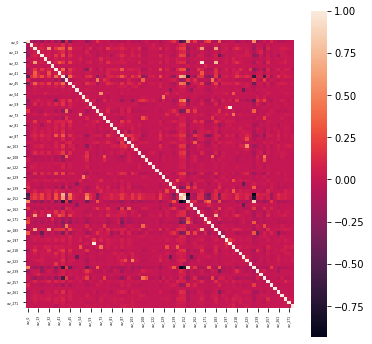

In [98]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_mat,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

# Modelado

## Preprocesado

In [162]:
# División de los datos en train y test
# ==============================================================================
X = datos_model.drop("label", axis=1)
y = datos_model['label']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        stratify     = y
                                    )

In [175]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [193]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_["cat"]['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76950 entries, 0 to 76949
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   var_0                                  76950 non-null  float64
 1   var_6                                  76950 non-null  float64
 2   var_9                                  76950 non-null  float64
 3   var_13                                 76950 non-null  float64
 4   var_18                                 76950 non-null  float64
 5   var_29                                 76950 non-null  float64
 6   var_32                                 76950 non-null  float64
 7   var_38                                 76950 non-null  float64
 8   var_39                                 76950 non-null  float64
 9   var_41                                 76950 non-null  float64
 10  var_43                                 76950 non-null  float64
 11  va

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## LogisticRegression sin penalización

In [195]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none',
                            max_iter = 1000,
                            random_state = 1234)
modelo.fit(X = X_train_prep, y = y_train)

LogisticRegression(max_iter=1000, penalty='none', random_state=1234)

In [196]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [243]:
print("Porcentaje de la clase mayoritaria: ", 100 * datos_model_raw['label'].value_counts(normalize=True)[0],"%")

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy} %")

balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones,
                        adjusted  = True
           )
print("")
print(f"El balanced accuracy de test es: {100*balanced_accuracy} %")

Porcentaje de la clase mayoritaria:  96.3685698839772 %

El accuracy de test es: 96.34577398898014 %

El balanced accuracy de test es: 0.2537588277150782 %


In [236]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
df_predicciones = pd.DataFrame({"predicciones": predicciones, "label": y_test})

confusion_matrix = pd.crosstab(
    df_predicciones.label,
    df_predicciones.predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,18533,6
1,697,2


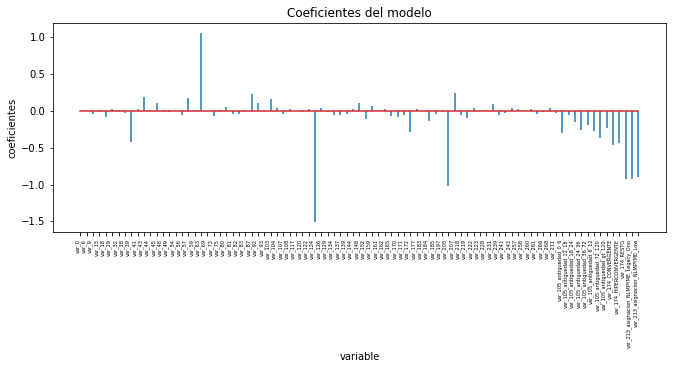

In [249]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': datos_train_prep.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')
plt.show();

## LogisticRegression con penalización

### Ridge

In [265]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
modelo = RidgeClassifierCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

modelo.fit(X = X_train_prep, y = y_train)

RidgeClassifierCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.8...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
                  store_cv_values=True)

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.84703e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.94992e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.39921e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.80362e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\U

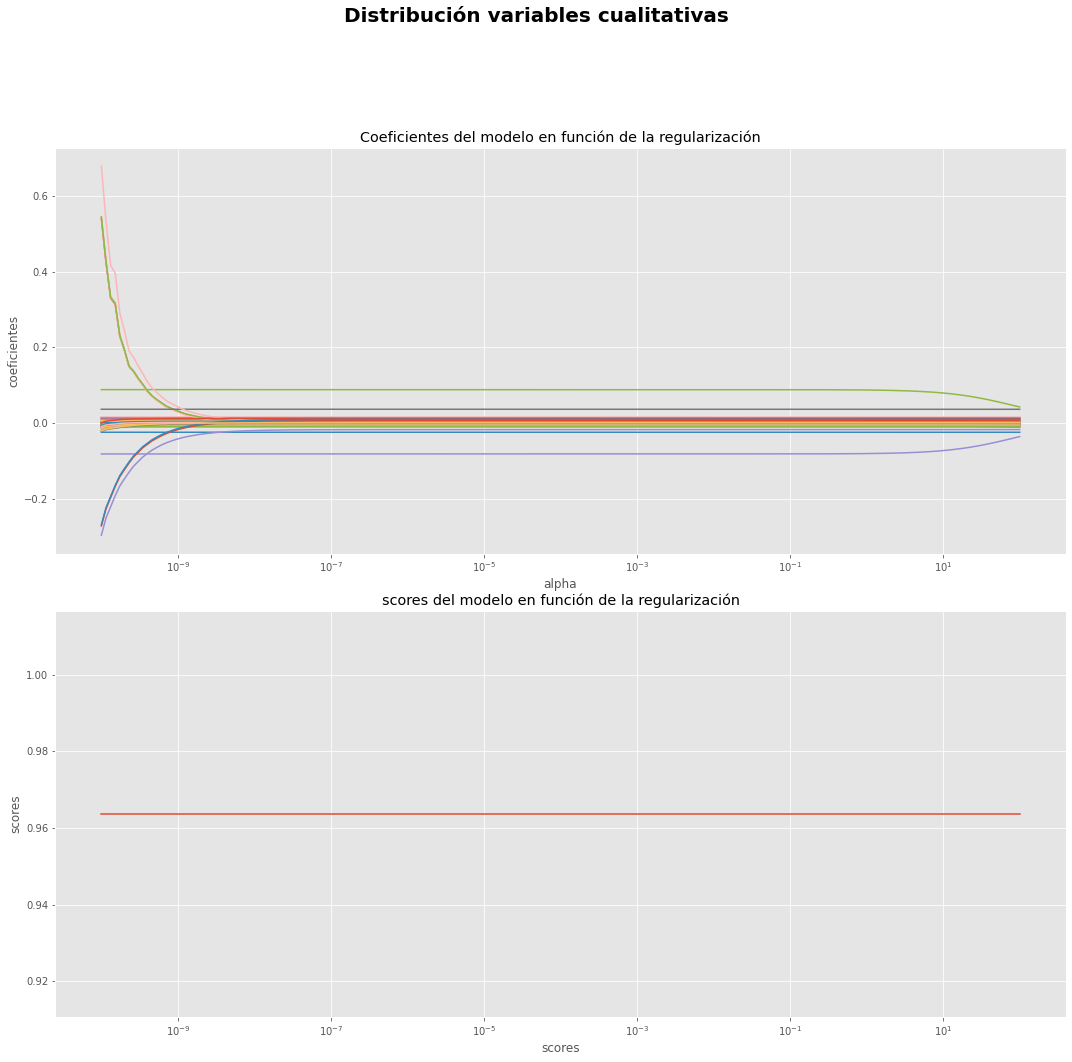

In [273]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []
scores = []

for alpha in alphas:
    modelo_temp = RidgeClassifier(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    scores.append(modelo_temp.score(X_test_prep, y_test))

# fig, ax = plt.subplots(figsize=(7, 3.84))
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# ax.set_xlabel('alpha')
# ax.set_ylabel('coeficientes')
# ax.set_title('Coeficientes del modelo en función de la regularización');
# plt.axis('tight')
# plt.show()

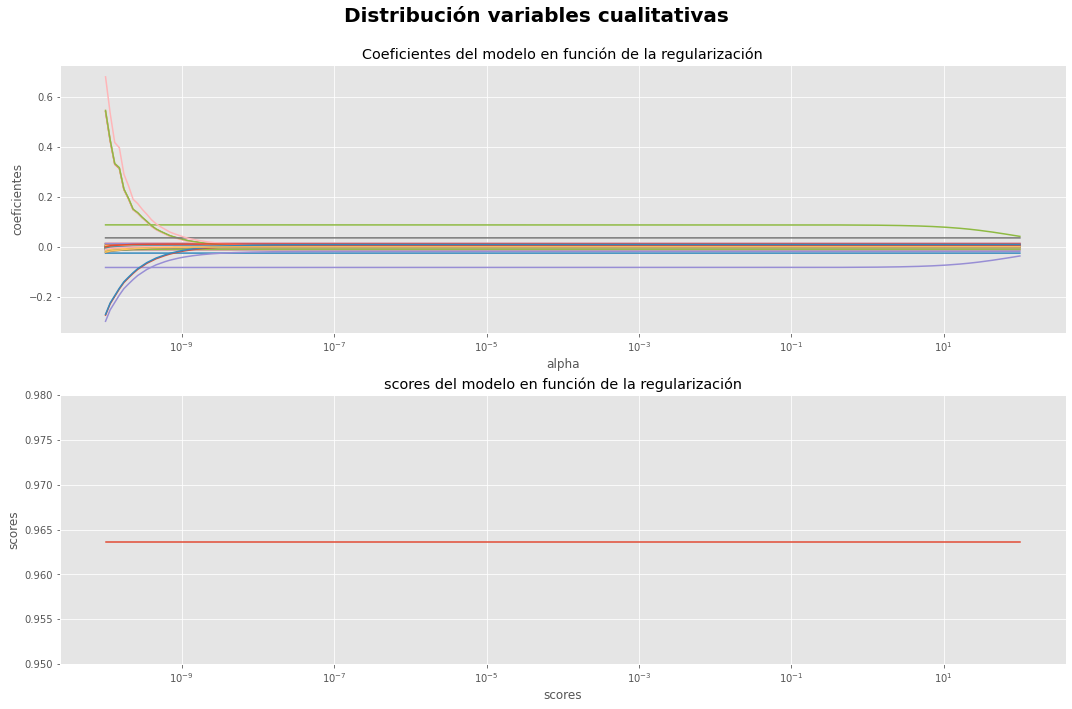

In [279]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(alphas, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('scores')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

In [257]:
# Predicción
# ==============================================================================
predicciones = modelo.predict(X_test_prep)

In [301]:
print("Porcentaje de la clase mayoritaria: ", 100 * datos_model_raw['label'].value_counts(normalize=True)[0],"%")

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy} %")

balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones,
                        adjusted  = True
           )
print("")
print(f"El balanced accuracy de test es: {100*balanced_accuracy} %")

Porcentaje de la clase mayoritaria:  96.3685698839772 %

El accuracy de test es: 96.36656617111966 %

El balanced accuracy de test es: 0.0 %


In [281]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
df_predicciones = pd.DataFrame({"predicciones": predicciones, "label": y_test})

confusion_matrix = pd.crosstab(
    df_predicciones.label,
    df_predicciones.predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0
Real,
0,18539
1,699


### Logistic Regression L1

In [297]:
# Creación y entrenamiento del modelo 
# ==============================================================================
modelo = LogisticRegressionCV(
            penalty         = "l1",
            Cs              = np.logspace(-4, 4, 10),
            fit_intercept   = True,
            cv              = 3,
            scoring         = "balanced_accuracy",
            solver          = "saga",
            refit           = True,
            max_iter        = 10,
            n_jobs          = multiprocessing.cpu_count() - 1,
            verbose         = True
         )

modelo.fit(X = X_train_prep, y = y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


convergence after 5 epochs took 1 seconds
convergence after 5 epochs took 1 seconds
convergence after 6 epochs took 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds
max_iter reached after 2 seconds

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,



max_iter reached after 2 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds
max_iter reached after 2 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds


C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   15.2s finished
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegressionCV(Cs=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                     cv=3, max_iter=10, n_jobs=3, penalty='l1',
                     scoring='balanced_accuracy', solver='saga', verbose=True)

In [298]:
# Evolución de los coeficientes en función de C
# ==============================================================================
cs = modelo.Cs_
coefs = []
scores = []

for c in cs:
    modelo_temp = LogisticRegression(
            penalty         = "l1",
            C               = c,
            fit_intercept   = True,
            solver          = "saga",
            max_iter=100,
            n_jobs          = multiprocessing.cpu_count() - 1,
         )
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    predicciones_temp = modelo.predict(X_test_prep)
    balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones_temp,
                        adjusted  = True
           )
    scores.append(balanced_accuracy)

# fig, ax = plt.subplots(figsize=(7, 3.84))
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# ax.set_xlabel('alpha')
# ax.set_ylabel('coeficientes')
# ax.set_title('Coeficientes del modelo en función de la regularización');
# plt.axis('tight')
# plt.show()

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  Conve

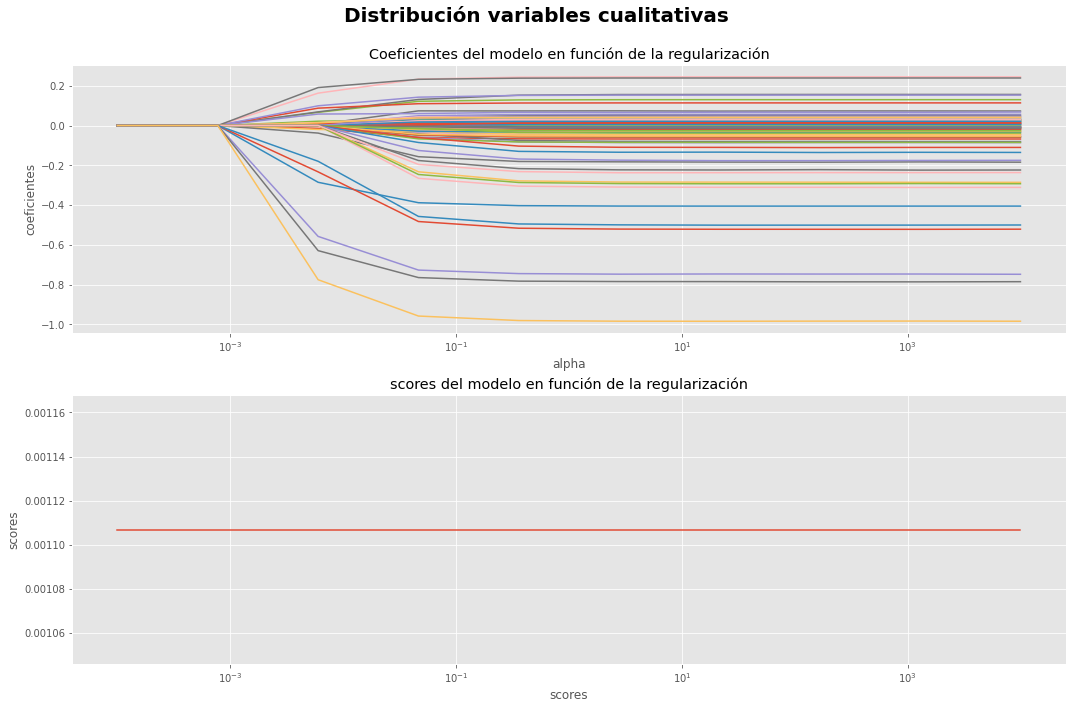

In [300]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(cs, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(cs, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('C')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
# axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

### Logistic Regression L2

In [ ]:
# Creación y entrenamiento del modelo 
# ==============================================================================
modelo = LogisticRegressionCV(
            penalty         = "l2",
            Cs              = np.logspace(-4, 4, 10),
            fit_intercept   = True,
            cv              = 3,
            scoring         = "balanced_accuracy_score",
            solver          = "saga",
            refit           = True,
            n_jobs          = multiprocessing.cpu_count() - 1,
            max_iter        = 1000,
            verbose         = True
         )

modelo.fit(X = X_train_prep, y = y_train)

In [303]:
# Evolución de los coeficientes en función de C
# ==============================================================================
cs = np.logspace(-4, 4, 10)
coefs = []
scores = []

for c in cs:
    modelo_temp = LogisticRegression(
            penalty         = "l2",
            C               = c,
            fit_intercept   = True,
            solver          = "saga",
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
         )
    modelo_temp.fit(X_train_prep, y_train)
    coefs.append(modelo_temp.coef_.flatten())
    predicciones_temp = modelo.predict(X_test_prep)
    balanced_accuracy = balanced_accuracy_score(
                        y_true    = y_test,
                        y_pred    = predicciones_temp,
                        adjusted  = True
           )
    scores.append(balanced_accuracy)

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  Conve

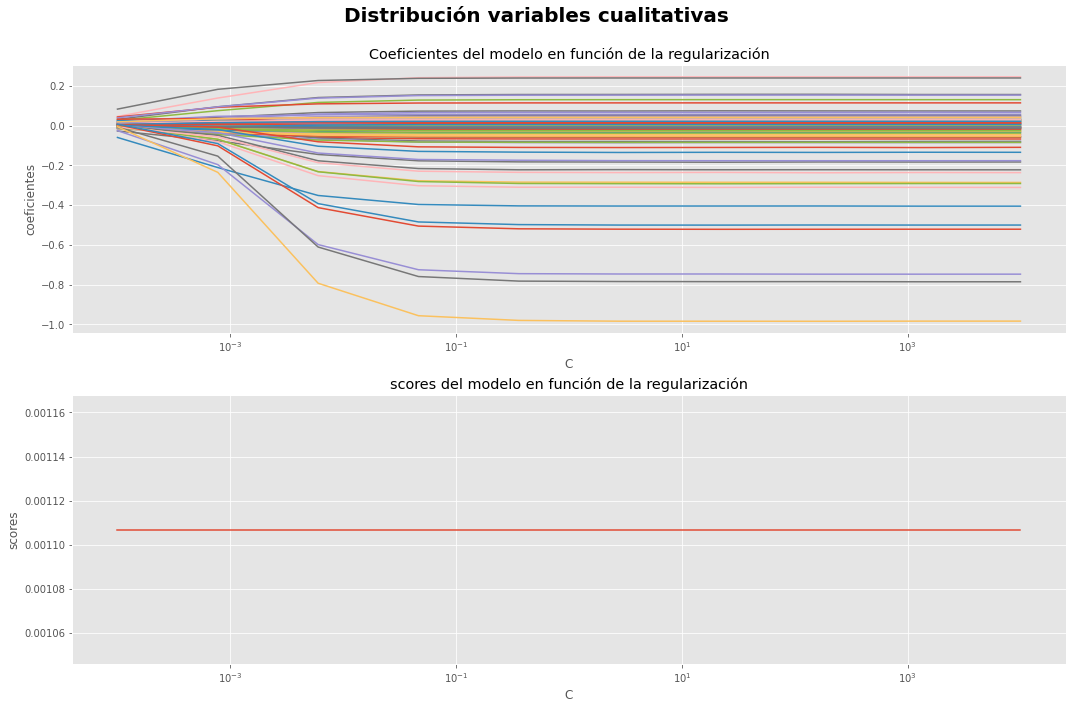

In [304]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flat

axes[0].plot(cs, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('coeficientes')
axes[0].set_title('Coeficientes del modelo en función de la regularización')

axes[1].plot(cs, scores)
axes[1].set_xscale('log')
axes[1].set_xlabel('C')
axes[1].set_ylabel('scores')
axes[1].set_title('scores del modelo en función de la regularización')
# axes[1].set_ylim(0.95, 0.98)

fig.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 20, fontweight = "bold")
plt.show();

In [306]:
modelo = LogisticRegression(
            penalty         = "elasticnet",
            C               = 1,
            fit_intercept   = True,
            solver          = "saga",
            max_iter        = 1000,
            n_jobs          = multiprocessing.cpu_count() - 1,
            l1_ratio = 0.5
         )
modelo.fit(X = X_train_prep, y = y_train)

C:\Users\JESCOBARO\Anaconda3\envs\skforecast\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, n_jobs=3,
                   penalty='elasticnet', solver='saga')

In [309]:
predicciones = modelo.predict(X_test_prep)
balanced_accuracy = balanced_accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
                    adjusted  = True
       )
balanced_accuracy

0.0024836479351690866

# Datos predicción

In [13]:
zip_file = zipfile.ZipFile(r".\Archive.zip")
datos_pred = pd.read_csv(zip_file.open("datos_para_prediccion.csv"))

In [14]:
datos_pred

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_266,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275
0,9248245,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
1,10907006,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
2,14080498,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
3,29764234,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.0,2.0,0,0.0,0.0,0,0.0,0,0.0
4,32791073,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,9.09,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71391,3029101742,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,2.0,0,0.0,0.0,0,0.0,0,0.0
71392,3033578041,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
71393,3035802671,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
71394,3047197511,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
